In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [2]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)


In [3]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
movies_df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [5]:
#movies_df[pd.isnull(movies_df).any(axis=1)]
len(movies_df)-movies_df['IMDb'].count()

571

In [6]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index().rename(columns={"film":"Title"})
# .rename(columns={"index":"Title", "film":"Nomination"})
df2.head()

,Title,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1


In [7]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2.head()

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Moulin Rouge,15
3,Mutiny on the Bounty,15
4,La La Land,14


In [8]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,Gigi,9


In [9]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Moulin Rouge,15,4.0
3,Mutiny on the Bounty,15,1.0
4,La La Land,14,6.0
...,...,...,...
4828,The Big Story,1,0.0
4829,The Island at the Top of the World,1,0.0
4830,Charly,1,1.0
4831,Christ among the Primitives,1,0.0


In [10]:
#Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [11]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [12]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [13]:
combined_df.describe()


,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,Nomination,Wins
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000,655.000000,655.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447,2.523664,0.519084
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222,2.535794,0.977977
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000,1.000000,0.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000,1.000000,0.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000,3.000000,1.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000,25.000000,5.000000


In [14]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [15]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [16]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [17]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [18]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0


In [19]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")
combined_df2.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [20]:
combined_df['Genres'].value_counts()

Drama                                  1341
Documentary                            1229
Comedy                                 1040
Comedy,Drama                            446
Horror                                  436
                                       ... 
Musical,Romance,Thriller                  1
Comedy,Horror,Musical,Sport,Western       1
Documentary,Biography,Crime,Music         1
Documentary,Drama,Family,News             1
Short,Comedy,Drama,Mystery,Thriller       1
Name: Genres, Length: 1909, dtype: int64

In [21]:
genres_df = combined_df[['Genres', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Genres')
genres_df.head(10)

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
"Action,Sci-Fi",1,0,0,0
"Action,Adventure,Sci-Fi",1,0,0,0
"Adventure,Comedy,Sci-Fi",1,0,0,0
Western,1,0,1,0
"Animation,Action,Adventure,Family,Sci-Fi",1,0,0,0
"Biography,Drama,Music,War",1,0,1,0
"Drama,Western",1,0,0,0
"Action,Adventure",1,0,0,0


In [22]:
country_df = combined_df['Country'].value_counts()
country_df.head(15)


United States                   8776
India                           1064
United Kingdom                   905
Canada                           555
Australia                        202
Japan                            175
United Kingdom,United States     172
France                           167
Hong Kong                        153
Canada,United States             150
Italy                            142
United States,Canada             138
South Korea                      122
Spain                            115
Germany                          103
Name: Country, dtype: int64

In [23]:
#countries_stream_df = combined_df[['Country', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Country')
#countries_stream_df.dropna(how='any')
#bool_series = pd.isnull(countries_stream_df['Hulu'])
#countries_stream_df[bool_series]
#countries_stream_df
stream_services_country = combined_df.groupby('Country')[['Netflix', 'Hulu', 'Prime Video','Disney+']].count()
#stream_services_country_df = stream_services_country.to_frame()
stream_services_country.head()

,Netflix,Hulu,Prime Video,Disney+
Country,,,,
"Afghanistan,France",1,1,1,1
"Afghanistan,United States",1,1,1,1
"Albania,Austria,France",1,1,1,1
"Albania,Greece,France",1,1,1,1
"Albania,United States",1,1,1,1


In [24]:
#Create new dataframe excluding null values from 'Country'
country_df = combined_df[combined_df['Country'].isna()==False]
country_df

#Split genres name and count no. of movies in each genre
country_count = {}
for x in country_df["Country"].values:

    country_list = x.split(",")
    #print (country_list)
    for y in country_list:
        y = y.strip()
        #print(y)
        if y not in country_count:
            country_count[y]=0
        country_count[y] +=1
        #print(country_count)
    
#country_count

country_name = country_count.keys() 
count_country = country_count.values() 



allcountries_df=pd.DataFrame(count_country, country_name)
allcountries_df.head(10)
#country_df

,0
United States,10486
United Kingdom,1713
Italy,417
Spain,329
West Germany,69
France,741
Poland,63
Germany,498
India,1157
Mexico,183


In [25]:
#Select the top 15 countries by value counts
country_top_df = allcountries_df[0:15]

country_top_df=country_top_df.reset_index().rename(columns={'index':'Country', 0:'Counts'})

country_top_df= country_top_df.sort_values('Counts',ascending = False)

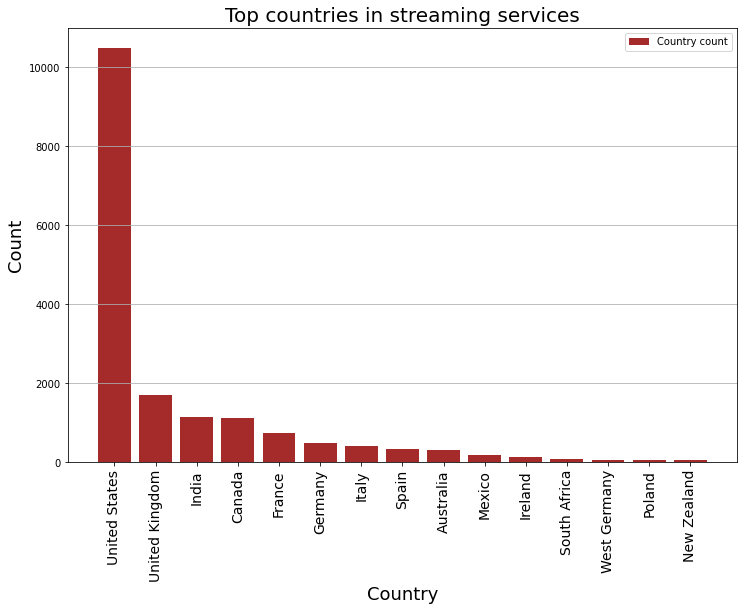

In [26]:
#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()

In [27]:
combined_df['Language'].value_counts().head(15)

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Korean                90
English,German        83
German                76
Hindi,English         72
Telugu                67
Name: Language, dtype: int64

In [28]:
#Create new dataframe excluding null values from 'Language'
language_df = combined_df[combined_df['Language'].isna()==False]

#Split genres name and count no. of movies in each genre
language_count = {}
for x in language_df["Language"].values:

    language_list = x.split(",")
    #print (language_list)
    for y in language_list:
        y = y.strip()
        #print(y)
        if y not in language_count:
            language_count[y]=0
        language_count[y] +=1
        #print(country_count)
    
#country_count

language_name = language_count.keys() 
count_language = language_count.values() 



alllanguages_df=pd.DataFrame(count_language, language_name)
alllanguages_df.head(10)

,0
English,13233
Japanese,317
French,799
Italian,440
Spanish,872
German,483
Russian,222
Hebrew,86
Arabic,190
Nepali,6


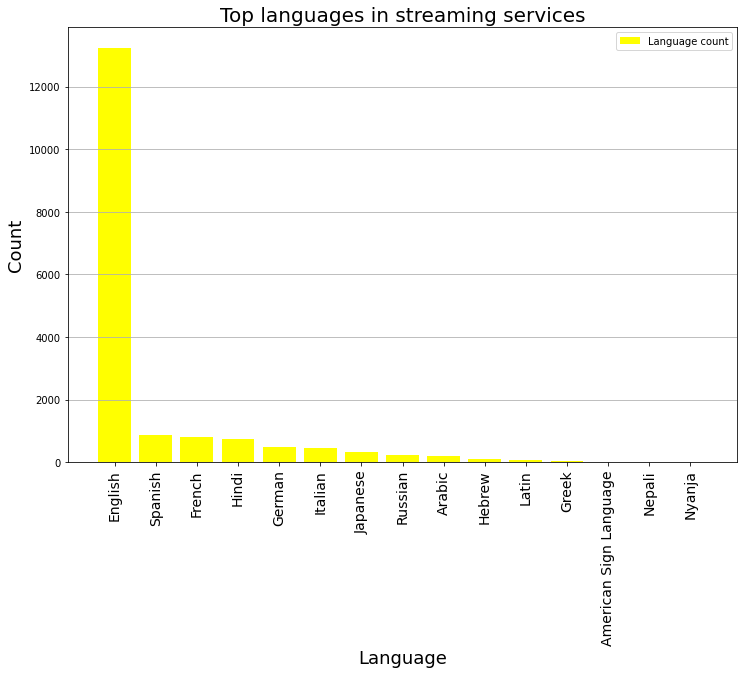

In [29]:
#Select the top 15 languages by value counts
language_top = alllanguages_df[0:15]
language_top_df=language_top.reset_index().rename(columns={'index':'Language', 0:'Counts'})
language_top_df= language_top_df.sort_values('Counts',ascending = False)

#Specify x & y values
xvalues = language_top_df['Language'].values
yvalues= language_top_df['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='yellow', alpha = 1, align="center")
plt.xticks(language_top_df['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in streaming services", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/languages.png")
plt.show()

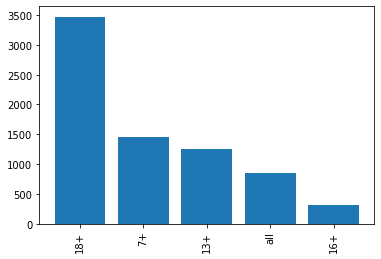

In [30]:
age = combined_df['Age'].value_counts()
#age
age_df=age.to_frame().reset_index().rename(columns={"index":"Age", "Age":"Counts"})
#age_df = age_df.set_index()
#age_df.set_index(Age)
#plt.pie =(age_df['Counts'].values, labels = index.values)
#plt.show()
#plt.pie(group_netflix.values,labels=group_netflix.index)
plt.bar(age.index, age.values)
plt.xticks(age.index, rotation=90)
plt.show()

In [31]:
# List of service names
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Create a dataframe for Netflix values =1
#netflix_data = combined_df.copy()
netflix_data = combined_df[combined_df['Netflix']==1]

#Create a dataframe for Prime Video values =1
#prime_data = combined_df.copy()
prime_data = combined_df[combined_df['Prime Video']==1]

#Create a dataframe for Hulu values =1
#hulu_data = combined_df.copy()
hulu_data = combined_df[combined_df['Hulu']==1]

#Create a dataframe for Disney+ values =1
#disney_data = combined_df.copy()
disney_data = combined_df[combined_df['Disney+']==1]


In [32]:
#Create separate dataframes for streaming services with only US data in it

netflix_data_US = netflix_data[(netflix_data['Country'] == 'United States')]

prime_data_US = prime_data[(prime_data['Country'] == 'United States')]

hulu_data_US = hulu_data[(hulu_data['Country'] == 'United States')]

disney_data_US = disney_data[(disney_data['Country'] == 'United States')]

In [33]:
netflix_USmovies_count = len(netflix_data_US['Title'])

prime_USmovies_count = len(prime_data_US['Title'])

hulu_USmovies_count = len(hulu_data_US['Title'])

disney_USmovies_count = len(disney_data_US['Title'])

USmovies_count = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies (US)' :[netflix_USmovies_count, hulu_USmovies_count,
                                                       prime_USmovies_count, disney_USmovies_count]})
USmovies_count.sort_values('No. of movies (US)', ascending=False)

,Streaming Service,No. of movies (US)
2,Prime Video,6817
0,Netflix,1305
1,Hulu,502
3,Disney+,448


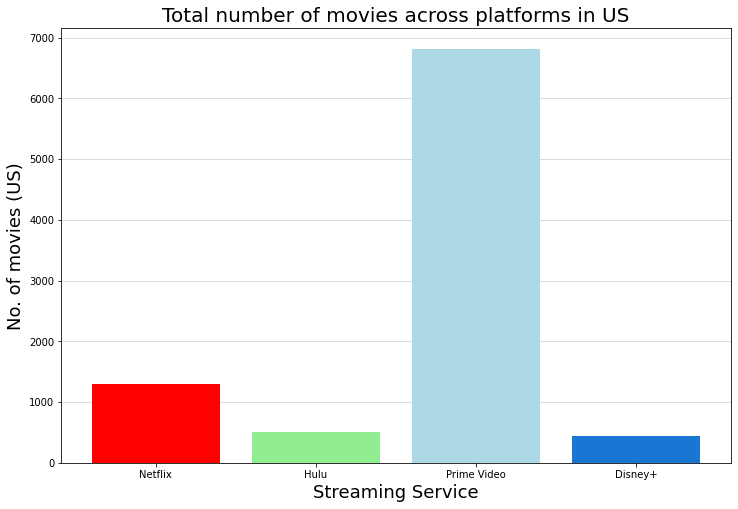

In [34]:
#Plot for no. of movies on different platforms in US


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(USmovies_count['Streaming Service'], USmovies_count['No. of movies (US)'],
                                         color=["red", "lightgreen", "lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Total number of movies across platforms in US', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies (US)", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()                                       


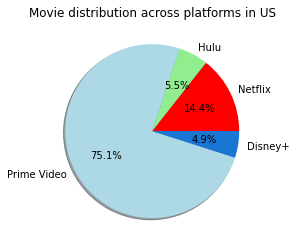

In [92]:
plt.pie(USmovies_count['No. of movies (US)'], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Movie distribution across platforms in US")
plt.show()

In [35]:
#Analysing no. of movies in each streaming service for their Rotten Tomotaes scoring

#Fill Nan values in Rotten Tomatoes with 0
#combined_df["Rotten Tomatoes"] = combined_df["Rotten Tomatoes"].fillna(0)

#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")

#Sort by descending order
rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)

#Convert it to dataframe and rename columns
rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings',
                                                                      'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df
# combined_df['Rotten Tomatoes'].value_counts()
#combined_df["Rotten Tomatoes"].dtypes


,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126
...,...,...
94,5,10
95,28,10
96,4,9
97,3,4


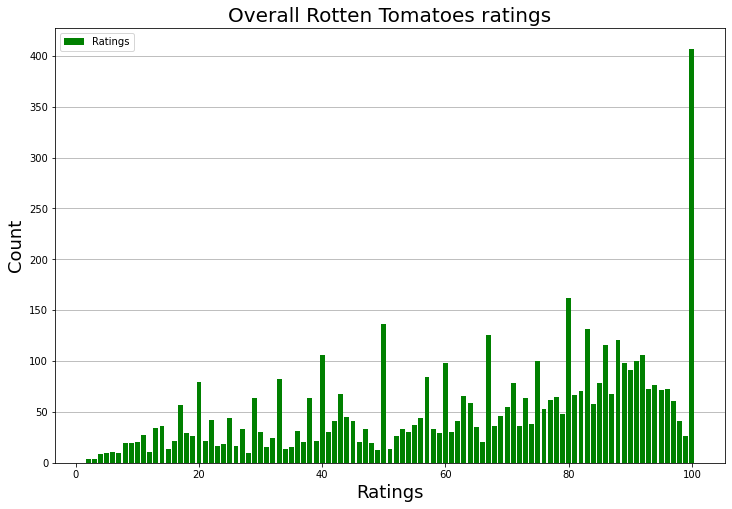

In [36]:
#Plot overall Rotten Tomatoes for all streaming services combined
rot_x = rotten_tomatoes_df['Ratings'].values.astype("int")
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
ticks=(np.arange(10, 100, step=10))
# plt.xticks(ticks, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/rot_tom.png")
plt.show()

In [37]:
#Analysing streaming services for content with 100% Rotten Tomatoes scoring. (Taking 100% RT score because there
#is highest no. of movies at this score. Refer to 'Overall RT ratings' plot)




#Taking data of RT score 100% (first row of value counts)
netflix_rt = netflix_data['Rotten Tomatoes'].value_counts()[0]
hulu_rt =hulu_data['Rotten Tomatoes'].value_counts()[0]
prime_rt = prime_data['Rotten Tomatoes'].value_counts()[0] 
disney_rt = disney_data['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt, hulu_rt, prime_rt, disney_rt]})
                                                                         
rot_tom_scores


,Streaming Service,No. of movies with 100% RT score
0,Netflix,130
1,Hulu,18
2,Prime Video,257
3,Disney+,19


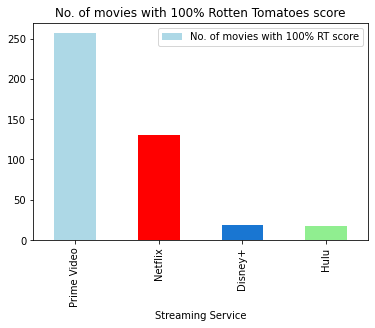

In [38]:
#plt.figure(figsize=(12,8))
rot_tom_scores.sort_values(ascending=False, by="No. of movies with 100% RT score").plot.bar('Streaming Service', 
                                        'No. of movies with 100% RT score', 
                                         color=["lightblue", "red", "#1976d2", "lightgreen"],
                                        title=('No. of movies with 100% Rotten Tomatoes score'))
                                                                               
plt.show()
#plt.title('No. of movies with 100% Rotten Tomatoes score')

In [39]:
#Analysing 100% RT score for movies in US only

netflix_rt_US = netflix_data_US['Rotten Tomatoes'].value_counts()[0]
hulu_rt_US =hulu_data_US['Rotten Tomatoes'].value_counts()[0]
prime_rt_US = prime_data_US['Rotten Tomatoes'].value_counts()[0] 
disney_rt_US = disney_data_US['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt_US, hulu_rt_US,
                                                                     prime_rt_US, disney_rt_US]})
                                                                         
rot_tom_scores_US

,Streaming Service,No. of movies with 100% RT score
0,Netflix,63
1,Hulu,12
2,Prime Video,141
3,Disney+,15


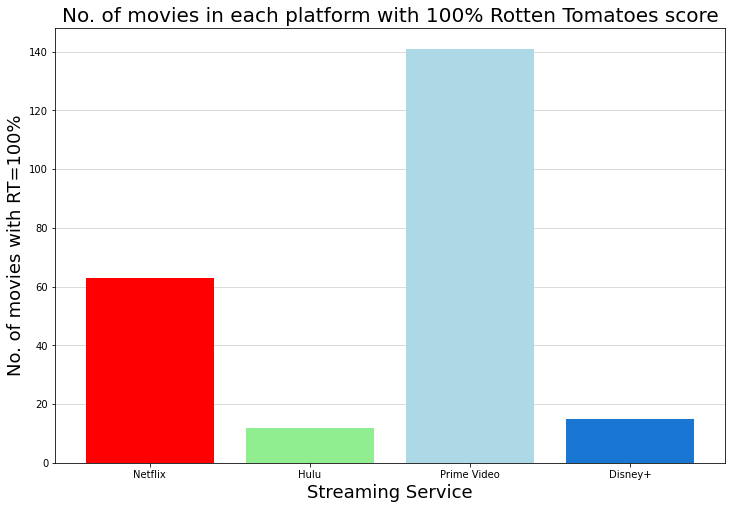

In [40]:
#Analysing 100% RT score for movies in US only

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(rot_tom_scores_US['Streaming Service'], rot_tom_scores_US['No. of movies with 100% RT score'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('No. of movies in each platform with 100% Rotten Tomatoes score', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies with RT=100%", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()                                     


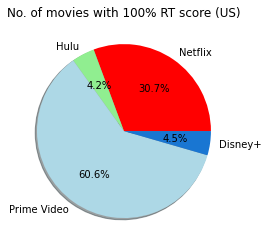

In [41]:
plt.pie(rot_tom_scores["No. of movies with 100% RT score"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")
plt.title("No. of movies with 100% RT score (US)")
plt.show()

In [42]:
netflix_percent_rotscore = (netflix_rt_US/netflix_USmovies_count)*100
netflix_percent_rotscore

prime_percent_rotscore = (prime_rt_US/prime_USmovies_count)*100

hulu_percent_rotscore = (hulu_rt_US/hulu_USmovies_count)*100

disney_percent_rotscore = (disney_rt_US/disney_USmovies_count)*100

percent_rotscore = pd.DataFrame({'Streaming Service': streaming_services,
                                '% of movies with 100% RT score' :[netflix_percent_rotscore, hulu_percent_rotscore,
                                                                     prime_percent_rotscore, disney_percent_rotscore]})
percent_rotscore

,Streaming Service,% of movies with 100% RT score
0,Netflix,4.827586
1,Hulu,2.390438
2,Prime Video,2.068359
3,Disney+,3.348214


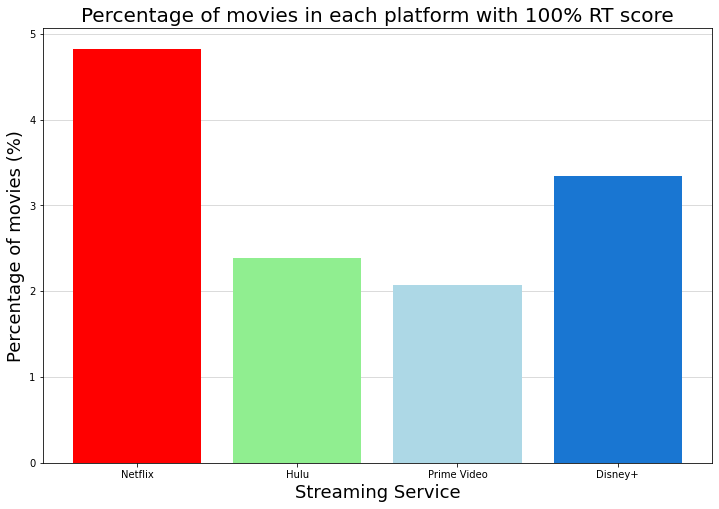

In [43]:
#Plot for percentage of movies in each platform in US with a RT score of 100%


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(percent_rotscore['Streaming Service'], percent_rotscore['% of movies with 100% RT score'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Percentage of movies in each platform with 100% RT score', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Percentage of movies (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()                                     


In [44]:
#Analysing mean RT score across platforms in US only

netflix_RT_drop = netflix_data_US['Rotten Tomatoes'].dropna()

netflix_RT_clean = netflix_RT_drop.reset_index()

netflix_RT_clean['Rotten Tomatoes'] = netflix_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

netflix_RT_mean = netflix_RT_clean['Rotten Tomatoes'].mean()


hulu_RT_drop = hulu_data_US['Rotten Tomatoes'].dropna()

hulu_RT_clean = hulu_RT_drop.reset_index()

hulu_RT_clean['Rotten Tomatoes'] = hulu_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

hulu_RT_mean = hulu_RT_clean['Rotten Tomatoes'].mean()


prime_RT_drop = prime_data_US['Rotten Tomatoes'].dropna()

prime_RT_clean = prime_RT_drop.reset_index()

prime_RT_clean['Rotten Tomatoes'] = prime_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

prime_RT_mean = prime_RT_clean['Rotten Tomatoes'].mean()


disney_RT_drop = disney_data_US['Rotten Tomatoes'].dropna()

disney_RT_clean = disney_RT_drop.reset_index()

disney_RT_clean['Rotten Tomatoes'] = disney_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

disney_RT_mean = disney_RT_clean['Rotten Tomatoes'].mean()


                                                            
                                                             

RT_scores_mean = pd.DataFrame({'Streaming Service': streaming_services,
                                'Mean RT score' :[netflix_RT_mean, hulu_RT_mean,
                                                  prime_RT_mean, disney_RT_mean]})
                                                                         
RT_scores_mean


,Streaming Service,Mean RT score
0,Netflix,65.621583
1,Hulu,66.643068
2,Prime Video,62.549521
3,Disney+,64.777372


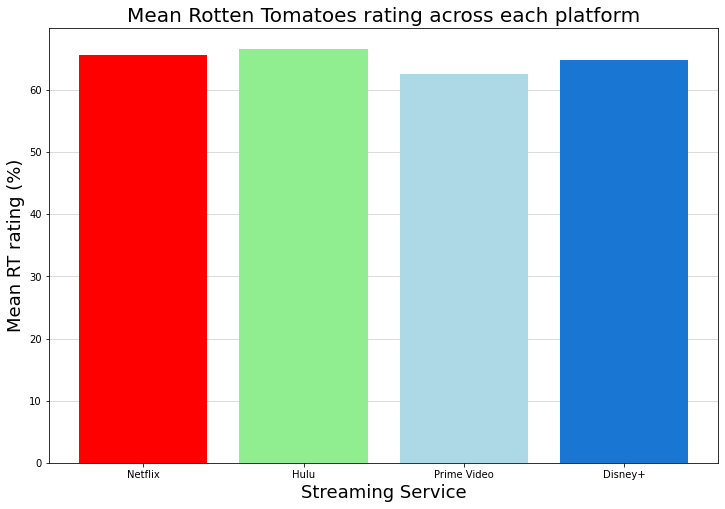

In [45]:
#Plot for mean RT score across each platform in US 


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(RT_scores_mean['Streaming Service'], RT_scores_mean['Mean RT score'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Mean Rotten Tomatoes rating across each platform', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Mean RT rating (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()        

In [46]:
# Analyze the percentage of movies in each platform in US with RT > 60%

netflix_RT60 = netflix_RT_clean[netflix_RT_clean['Rotten Tomatoes']>60]

netflix_RT60_count = netflix_RT60['Rotten Tomatoes'].count()

netflix_RT60_percent = (netflix_RT60_count/netflix_USmovies_count)*100


hulu_RT60 = hulu_RT_clean[hulu_RT_clean['Rotten Tomatoes']>60]

hulu_RT60_count = hulu_RT60['Rotten Tomatoes'].count()

hulu_RT60_percent = (hulu_RT60_count/hulu_USmovies_count)*100


prime_RT60 = prime_RT_clean[prime_RT_clean['Rotten Tomatoes']>60]

prime_RT60_count = prime_RT60['Rotten Tomatoes'].count()

prime_RT60_percent = (prime_RT60_count/prime_USmovies_count)*100


disney_RT60 = disney_RT_clean[disney_RT_clean['Rotten Tomatoes']>60]

disney_RT60_count = disney_RT60['Rotten Tomatoes'].count()

disney_RT60_percent = (disney_RT60_count/disney_USmovies_count)*100




percent_RT60 = pd.DataFrame({'Streaming Service': streaming_services,
                                '% of movies with RT > 60' :[netflix_RT60_percent, hulu_RT60_percent,
                                                                     prime_RT60_percent, disney_RT60_percent]})
percent_RT60



,Streaming Service,% of movies with RT > 60
0,Netflix,32.796935
1,Hulu,44.621514
2,Prime Video,12.996919
3,Disney+,36.160714


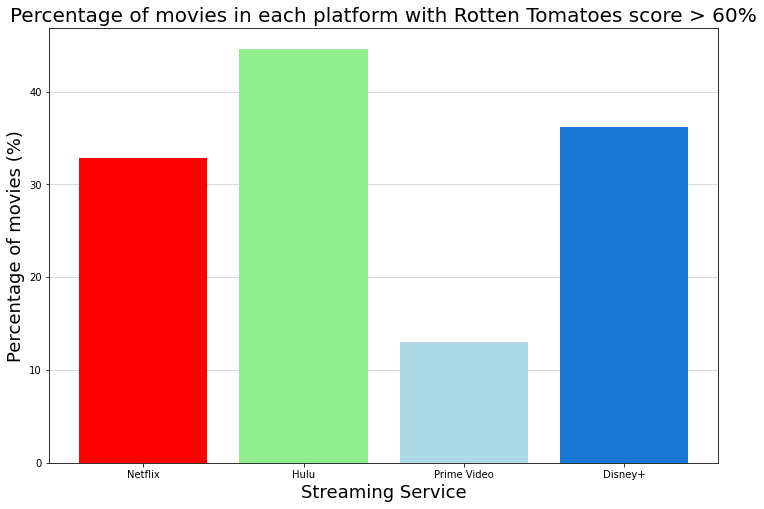

In [47]:
#Plot for percentage of movies in each platform in US with RT score > 60%


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(percent_RT60['Streaming Service'], percent_RT60['% of movies with RT > 60'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Percentage of movies in each platform with Rotten Tomatoes score > 60%', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Percentage of movies (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()        

In [90]:
#Plot for number of movies in each platform in US with RT score > 60%

#Create a dataframe
count_RT60 = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with RT > 60' :[netflix_RT60_count, hulu_RT60_count,
                                                                     prime_RT60_count, disney_RT60_count]})


count_RT60

 

,Streaming Service,No. of movies with RT > 60
0,Netflix,428
1,Hulu,224
2,Prime Video,886
3,Disney+,162


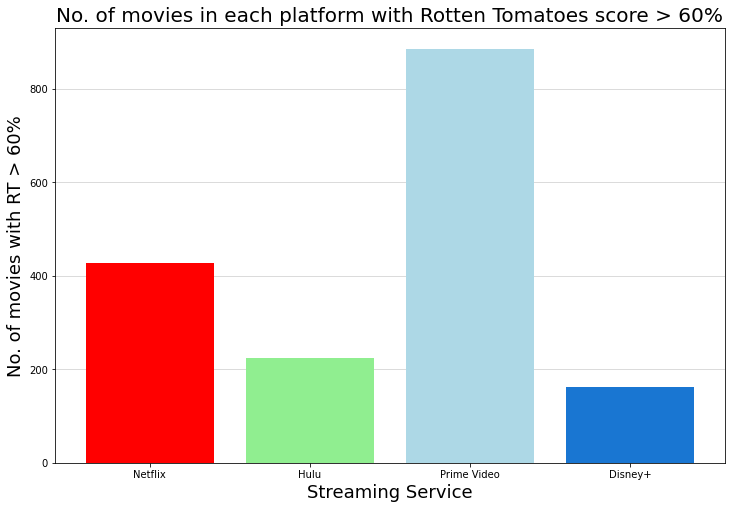

In [91]:
#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(count_RT60['Streaming Service'], count_RT60['No. of movies with RT > 60'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('No. of movies in each platform with Rotten Tomatoes score > 60%', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies with RT > 60%", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()       

In [49]:
combined_df['IMDb'].fillna(0)
imdb = combined_df['IMDb'].value_counts().reset_index().sort_values("index").set_index("index")
imdb

,IMDb
index,
0.0,4
1.0,2
1.3,1
1.4,4
1.5,2
...,...
8.8,14
8.9,11
9.0,3


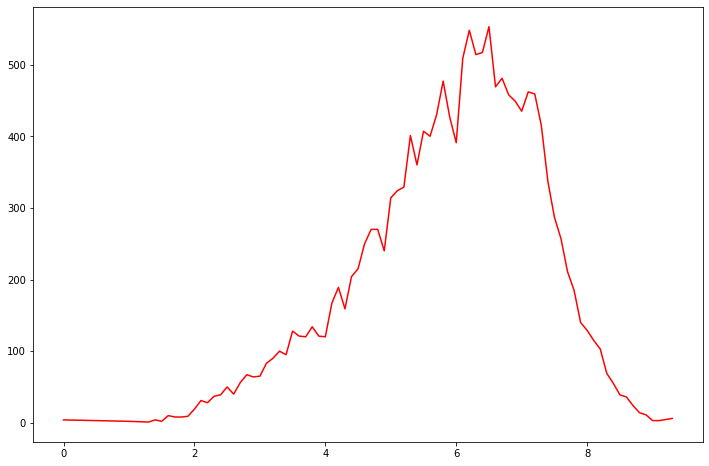

In [50]:
plt.figure(figsize=(12,8))
plt.plot(imdb.index, imdb["IMDb"], color="Red")

In [51]:
#Netflix movies count for year 2015-2020
netflix_new = netflix_data[netflix_data["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new

netflix_new_df = netflix_new.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count for year 2015-2020
prime_new = prime_data[prime_data["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new

prime_new_df = prime_new.to_frame().reset_index()
prime_new_df.T

#Hulu movies count for year 2015-2020
hulu_new = hulu_data[hulu_data["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new

hulu_new_df = hulu_new.to_frame().reset_index()
hulu_new_df.T

#Disney movies count for year 2015-2020
disney_new = disney_data[disney_data["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new

disney_new_df = disney_new.to_frame().reset_index()
disney_new_df

,Year,Disney+
0,2015,10
1,2016,17
2,2017,22
3,2018,16
4,2019,23
5,2020,9


In [52]:
merge1 = pd.merge(netflix_new_df, hulu_new_df,  on='Year' )
merge2 = pd.merge(prime_new_df, disney_new_df, on='Year')
year_merge = pd.merge(merge1, merge2, on='Year')
year_merge.set_index('Year')

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2015,272,61,765,10
2016,444,62,730,17
2017,569,124,763,22
2018,560,158,625,16
2019,428,104,172,23
2020,104,6,31,9


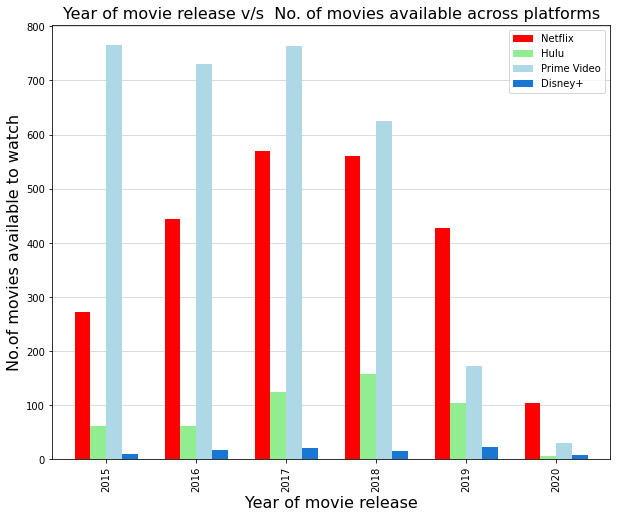

In [53]:
year_merge.plot.bar('Year',  color=["red", "lightgreen", "lightblue", "#1976d2"], figsize=(10,8), width=0.7)
                   
plt.title('Year of movie release v/s  No. of movies available across platforms', fontsize=16)

plt.ylabel('No.of movies available to watch', fontsize=16)
plt.xlabel('Year of movie release', fontsize=16)
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')

In [54]:
#Netflix movies count in US for year 2015-2020 
netflix_new_US = netflix_data_US[netflix_data_US["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new_US

netflix_new_df_US = netflix_new_US.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count in US for year 2015-2020
prime_new_US = prime_data_US[prime_data_US["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new_US

prime_new_df_US = prime_new_US.to_frame().reset_index()
prime_new_df_US.T

#Hulu movies count in US for year 2015-2020
hulu_new_US = hulu_data_US[hulu_data_US["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new_US

hulu_new_df_US = hulu_new_US.to_frame().reset_index()
hulu_new_df_US.T

#Disney movies count in US for year 2015-2020
disney_new_US = disney_data_US[disney_data_US["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new_US

disney_new_df_US = disney_new_US.to_frame().reset_index()
disney_new_df_US

,Year,Disney+
0,2015,9
1,2016,15
2,2017,18
3,2018,13
4,2019,17
5,2020,9


In [55]:
merge1_US = pd.merge(netflix_new_df_US, hulu_new_df_US,  on='Year' )
merge2_US = pd.merge(prime_new_df_US, disney_new_df_US,  on='Year')
year_merge_US = pd.merge(merge1_US, merge2_US, on='Year')
year_merge_US.set_index('Year')

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2015,93,34,410,9
2016,153,35,409,15
2017,219,59,390,18
2018,197,90,302,13
2019,181,65,100,17
2020,53,5,16,9


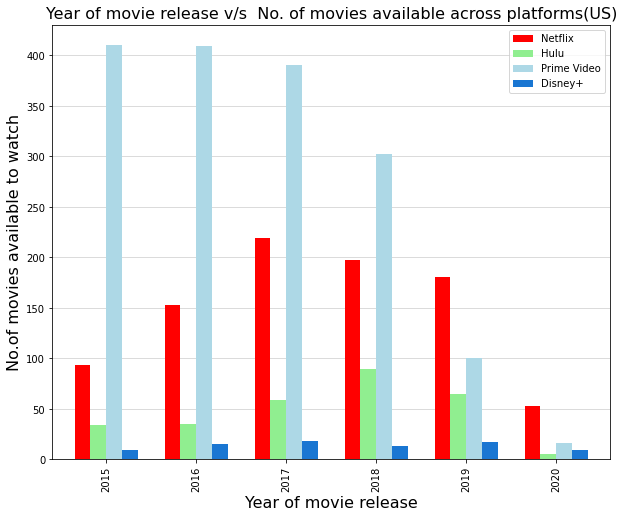

In [56]:
year_merge_US.plot.bar('Year',  color=["red", "lightgreen", "lightblue", "#1976d2"], figsize=(10,8), width=0.7,
                                      alpha=1, align='center')
                   
plt.title('Year of movie release v/s  No. of movies available across platforms(US)', fontsize=16)

plt.ylabel('No.of movies available to watch', fontsize=16)
plt.xlabel('Year of movie release', fontsize=16)
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')

In [57]:
# Count of movies produced in last 20 years

movie_count = combined_df.Year.value_counts()[:20].reset_index().sort_values(['Year'], ascending=True).rename(
                                                            columns = {"index": "Year" , "Year" : "Count"})
movie_count.head()

,Year,Count
19,2001,156
18,2000,172
17,2002,193
16,2003,214
15,2004,217


<Figure size 1440x720 with 0 Axes>

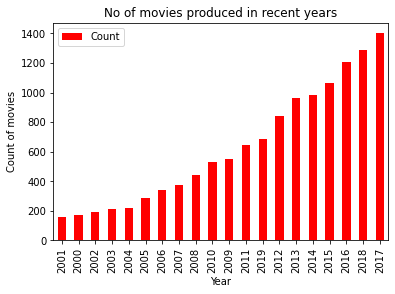

In [58]:
# Plot count of movies produced in last 20 years

plt.figure(figsize = (20,10))
movie_count.plot.bar("Year", "Count", colormap='autumn', alpha=1.0)
plt.title("No of movies produced in recent years")
plt.xlabel("Year")
plt.ylabel("Count of movies", )
plt.show()

In [59]:
netflix_lang = netflix_data_US["Language"].value_counts().head(20)
netflix_lang_df = netflix_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
netflix_lang_df.head(20)

,Language,Count
0,English,1094
1,"English,Spanish",40
2,"English,French",23
3,"English,Japanese",7
4,"English,German",5
5,"English,Mandarin",5
6,"English,Spanish,French",5
7,"English,American Sign Language",4
8,"English,Ukrainian",4
9,"English,Italian",3


Text(0.5, 1.0, 'Top 20 languages of Netflix movies')

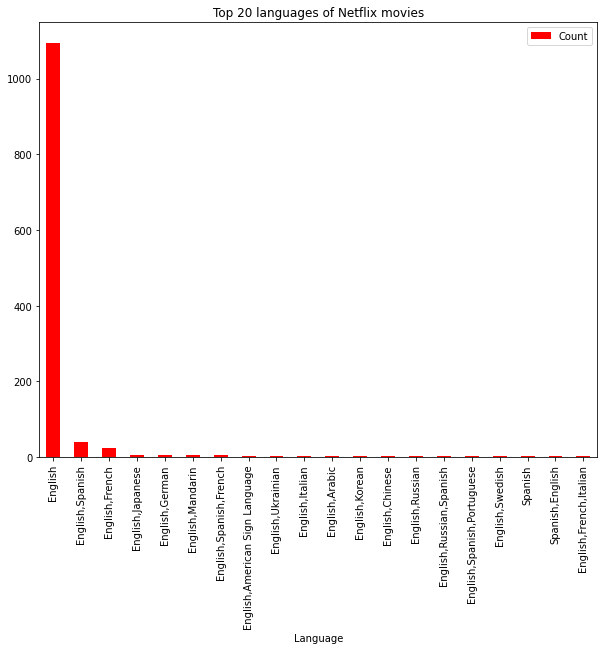

In [60]:
netflix_lang_df.plot.bar('Language', figsize=(10,8), color='red')
plt.title('Top 20 languages of Netflix movies')

In [61]:
hulu_lang = hulu_data_US["Language"].value_counts().head(15)
hulu_lang_df = hulu_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
hulu_lang_df.head(20)

,Language,Count
0,English,416
1,"English,Spanish",14
2,"English,French",11
3,"English,Italian",3
4,"English,Russian",3
5,"English,Klingon",3
6,"English,Arabic",2
7,"English,German",2
8,"English,French,German",2
9,"English,Japanese",2


Text(0.5, 1.0, 'Top 20 languages of Hulu movies')

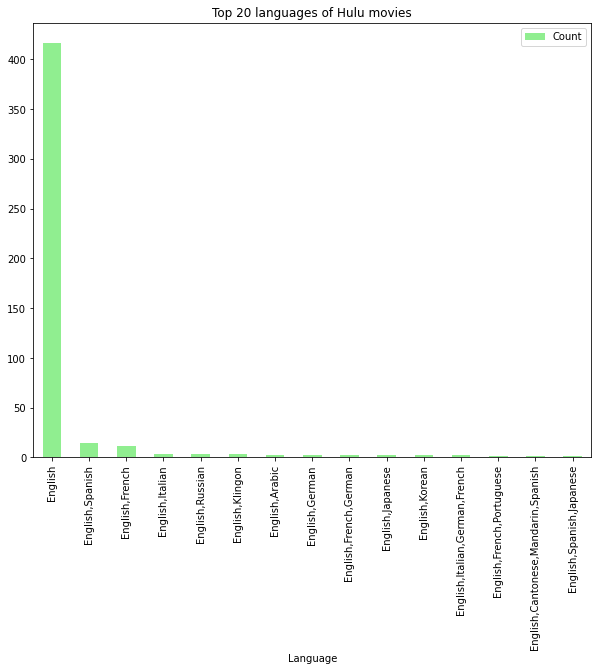

In [62]:
hulu_lang_df.plot.bar('Language', figsize=(10,8), color='lightgreen')
plt.title('Top 20 languages of Hulu movies')

In [63]:
prime_lang = prime_data_US["Language"].value_counts().head(15)
prime_lang_df = prime_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
prime_lang_df.head(20)

,Language,Count
0,English,6200
1,"English,Spanish",119
2,"English,French",42
3,"English,German",23
4,"English,Italian",16
5,"English,Japanese",11
6,"Spanish,English",10
7,"English,Korean",8
8,"English,American Sign Language",7
9,"English,Hebrew",7


Text(0.5, 1.0, 'Top 20 languages of Prime Video movies')

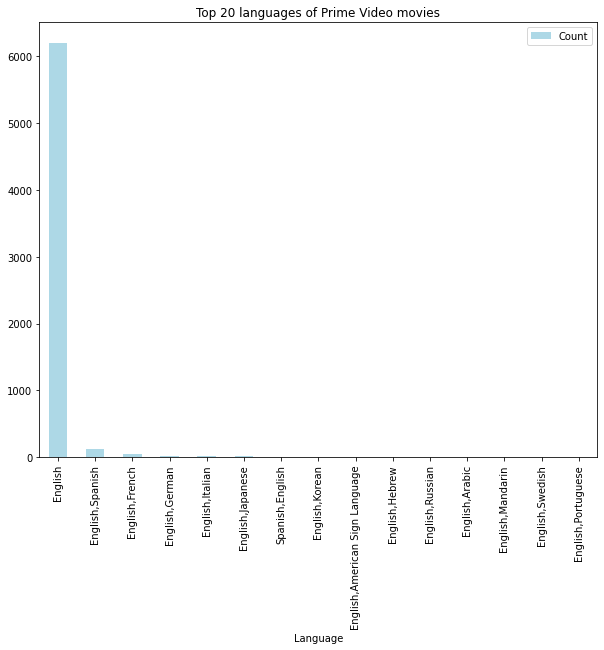

In [64]:
prime_lang_df.plot.bar('Language', figsize=(10,8), color="lightblue")
plt.title('Top 20 languages of Prime Video movies')

In [65]:
disney_lang = disney_data_US["Language"].value_counts().head(15)
disney_lang_df = disney_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
disney_lang_df.head(20)

,Language,Count
0,English,367
1,"English,French",15
2,"English,Spanish",7
3,"English,German",6
4,"English,Italian",3
5,"English,Portuguese",2
6,"English,Arabic",2
7,"English,Mandarin",2
8,"English,Inuktitut,Croatian,Serbian",2
9,"English,Korean",2


Text(0.5, 1.0, 'Top 20 languages of Disney movies')

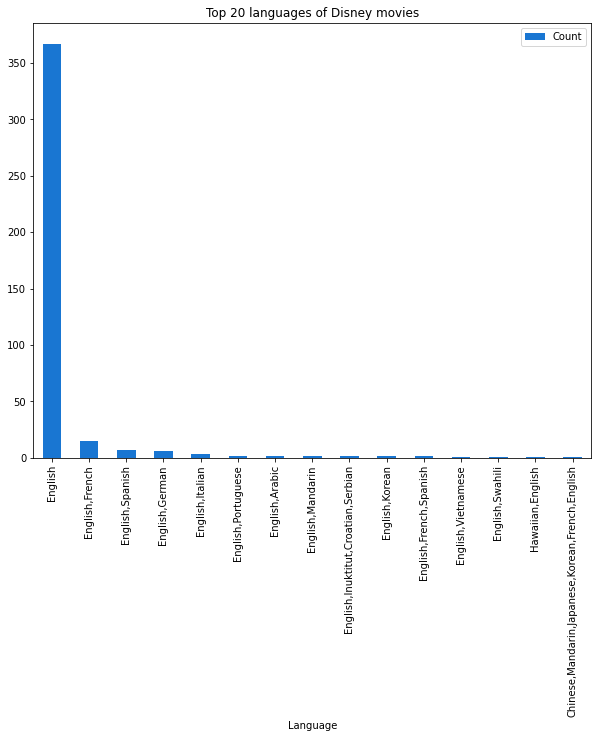

In [66]:
disney_lang_df.plot.bar('Language', figsize=(10,8), color='#1976d2')
plt.title('Top 20 languages of Disney movies')

In [67]:
disney_not_eng = disney_lang_df.loc[1:]
disney_not_eng

,Language,Count
1,"English,French",15
2,"English,Spanish",7
3,"English,German",6
4,"English,Italian",3
5,"English,Portuguese",2
6,"English,Arabic",2
7,"English,Mandarin",2
8,"English,Inuktitut,Croatian,Serbian",2
9,"English,Korean",2
10,"English,French,Spanish",2


Text(0.5, 1.0, 'Top 20 languages of Disney movies excluding English')

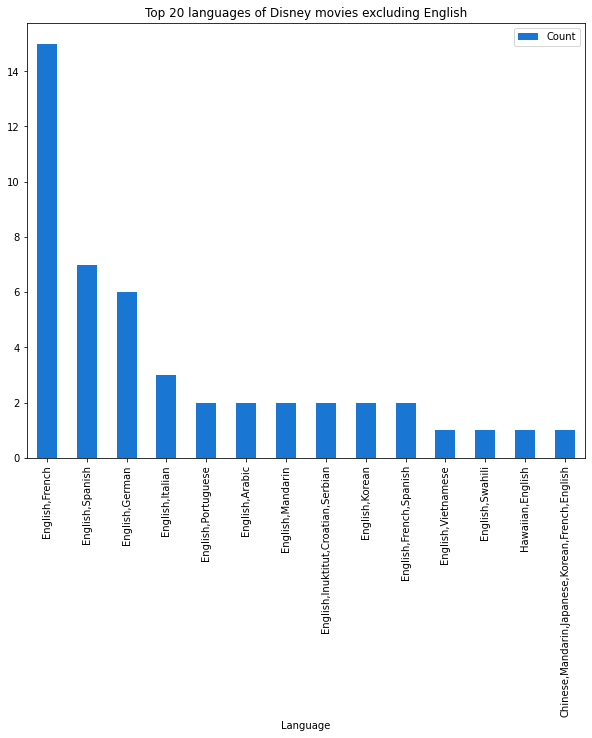

In [68]:
disney_not_eng.plot.bar('Language', figsize=(10,8), color='#1976d2')
plt.title('Top 20 languages of Disney movies excluding English')

In [69]:
#Analysing IMDb score for movies in US only

netflix_imdb_US = netflix_data_US[netflix_data_US['IMDb'] > 7]
net_imdb_count = netflix_imdb_US['IMDb'].count()

hulu_imdb_US =hulu_data_US[hulu_data_US['IMDb']> 7]
hulu_imdb_count = hulu_imdb_US['IMDb'].count()


prime_imdb_US = prime_data_US[prime_data_US['IMDb']> 7] 
prime_imdb_count = prime_imdb_US['IMDb'].count()


disney_imdb_US = disney_data_US[disney_data_US['IMDb']> 7]  
disney_imdb_count = disney_imdb_US['IMDb'].count()
                                                            
                                                             

imdb_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with IMDb > 7' :[net_imdb_count, hulu_imdb_count,
                                                                     prime_imdb_count, disney_imdb_count]})
                                                                         
imdb_scores_US


,Streaming Service,No. of movies with IMDb > 7
0,Netflix,327
1,Hulu,106
2,Prime Video,1059
3,Disney+,135


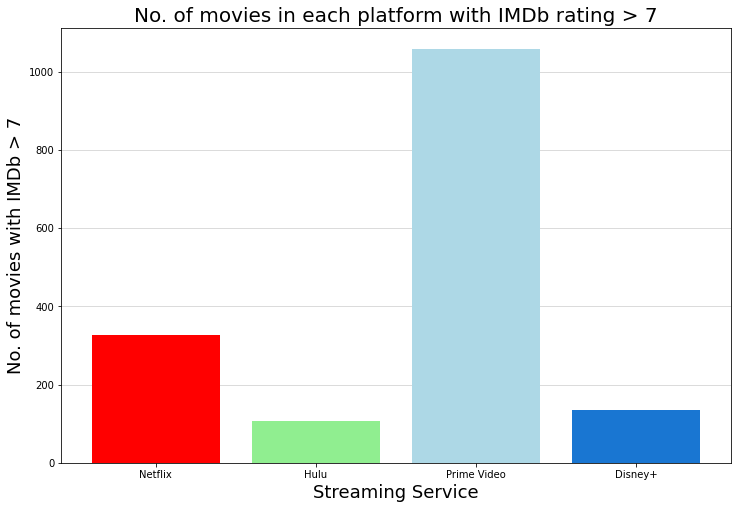

In [70]:
#Analysing movies with IMDb > 7 in US only

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(imdb_scores_US['Streaming Service'], imdb_scores_US['No. of movies with IMDb > 7'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('No. of movies in each platform with IMDb rating > 7', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies with IMDb > 7", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show() 

  

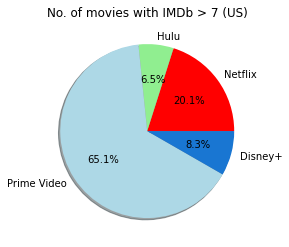

In [71]:
plt.pie(imdb_scores_US["No. of movies with IMDb > 7"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("No. of movies with IMDb > 7 (US)")
plt.show()

In [72]:
#Analysing percentage of movies in US in each platform with IMDb > 7 

netflix_percent_imdb = (net_imdb_count/netflix_USmovies_count)*100
netflix_percent_imdb

prime_percent_imdb = (prime_imdb_count/prime_USmovies_count)*100

hulu_percent_imdb = (hulu_imdb_count/hulu_USmovies_count)*100

disney_percent_imdb = (disney_imdb_count/disney_USmovies_count)*100

percent_imdb = pd.DataFrame({'Streaming Service': streaming_services,
                                '% of movies with IMDb > 7' :[netflix_percent_imdb, hulu_percent_imdb,
                                                                     prime_percent_imdb, disney_percent_imdb]})
percent_imdb


,Streaming Service,% of movies with IMDb > 7
0,Netflix,25.057471
1,Hulu,21.115538
2,Prime Video,15.534693
3,Disney+,30.133929


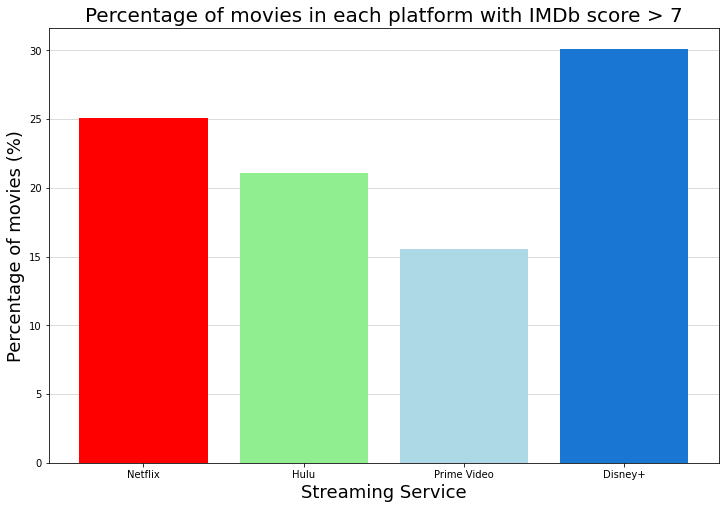

In [73]:
#Plot for percentage of movies in each platform in US with IMDb score > 7


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(percent_imdb['Streaming Service'], percent_imdb['% of movies with IMDb > 7'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Percentage of movies in each platform with IMDb score > 7', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Percentage of movies (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()                                     


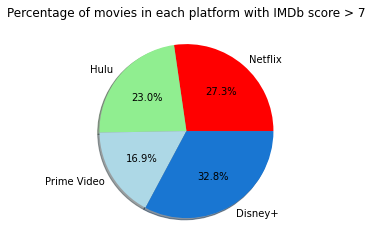

In [74]:
plt.pie(percent_imdb["% of movies with IMDb > 7"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Percentage of movies in each platform with IMDb score > 7")
plt.show()

In [75]:
#Analysing mean IMDb score across platforms in US only
netflix_imdb_mean = netflix_data_US['IMDb'].mean()

hulu_imdb_mean =hulu_data_US['IMDb'].mean()



prime_imdb_mean = prime_data_US['IMDb'].mean() 



disney_imdb_mean = disney_data_US['IMDb'].mean() 

                                                            
                                                             

imdb_scores_mean = pd.DataFrame({'Streaming Service': streaming_services,
                                'Mean IMDb' :[netflix_imdb_mean, hulu_imdb_mean,
                                                                     prime_imdb_mean, disney_imdb_mean]})
                                                                         
imdb_scores_mean
#netflix_imdb_mean

,Streaming Service,Mean IMDb
0,Netflix,6.246517
1,Hulu,6.091383
2,Prime Video,5.591975
3,Disney+,6.442729


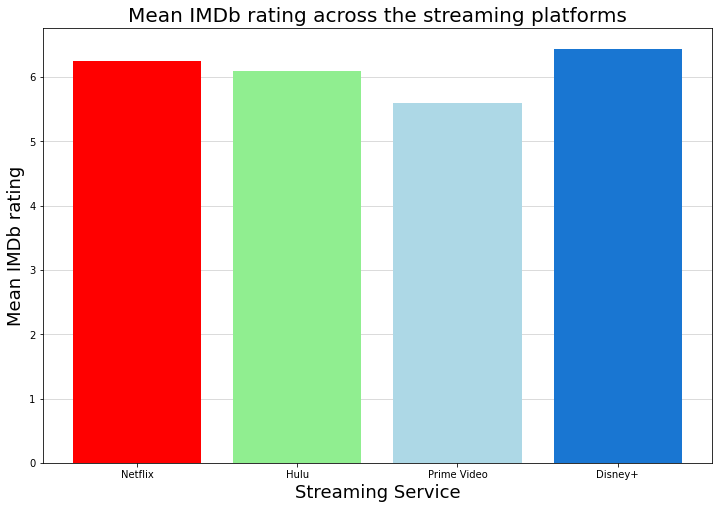

In [76]:
#Analysing mean IMDb score across platforms in US only

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(imdb_scores_mean['Streaming Service'], imdb_scores_mean['Mean IMDb'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Mean IMDb rating across the streaming platforms', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Mean IMDb rating", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/total_movies.png")
plt.show()            

In [77]:
#Split and Create new dataframe for movie languages in Netflix
netflix_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Netflix']==1)]


#Split languages names and count no. of movies in each languages
netflix_lang_count = {}
for x in netflix_lang["Language"].values:

    netflix_lang_list = x.split(",")
    #print (netflix_lang_list)
    for y in netflix_lang_list:
        y = y.strip()
        #print(y)
        if y not in netflix_lang_count:
            netflix_lang_count[y]=0
        netflix_lang_count[y] +=1
        #print(netflix_lang_count)
    
#netflix_lang_count

netflixlang_name = netflix_lang_count.keys() 
count_netflixlang = netflix_lang_count.values() 



all_netflix_lang_df=pd.DataFrame(count_netflixlang, netflixlang_name)
#all_netflix_lang_df.head(21)

netflix_lang_sort=all_netflix_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
netflix_lang_sort= netflix_lang_sort.sort_values('Counts',ascending = False)

netflix_lang_sort.reset_index().head(30)

,index,Language,Counts
0,0,English,2264
1,10,Hindi,377
2,4,Spanish,332
3,2,French,212
4,5,German,106
5,1,Japanese,91
6,8,Arabic,89
7,24,Mandarin,83
8,3,Italian,67
9,42,Turkish,58


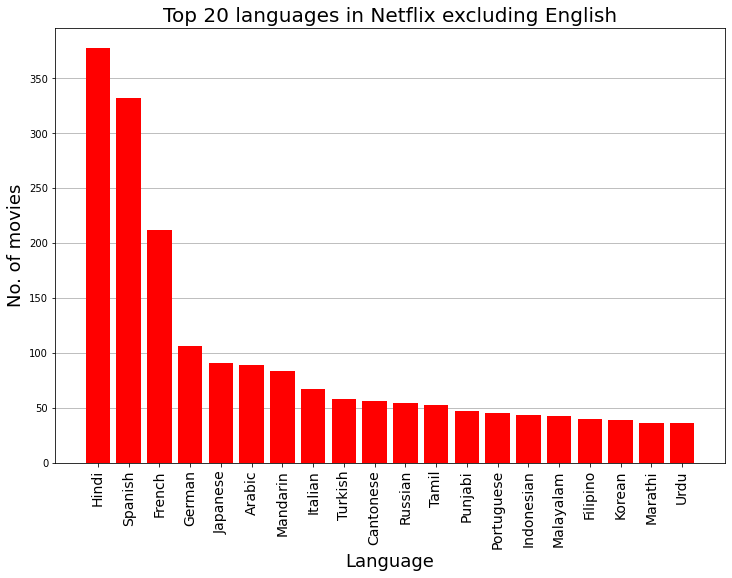

In [78]:
#Select the top 20 languages by value counts


netflix_lang_top = netflix_lang_sort[1:21]



#Specify x & y values
xvalues = netflix_lang_top['Language'].values
yvalues= netflix_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='red', alpha = 1, align="center")
plt.xticks(netflix_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top 20 languages in Netflix excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [79]:
#Split and Create new dataframe for movie languages in Prime Video
prime_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Prime Video']==1)]


#Split languages names and count no. of movies in each languages
prime_lang_count = {}
for x in prime_lang["Language"].values:

    prime_lang_list = x.split(",")
    
    for y in prime_lang_list:
        y = y.strip()
        
        if y not in prime_lang_count:
            prime_lang_count[y]=0
        prime_lang_count[y] +=1
        
    


primelang_name = prime_lang_count.keys() 
count_primelang = prime_lang_count.values() 



all_prime_lang_df=pd.DataFrame(count_primelang, primelang_name)
#all_prime_lang_df.head(21)


prime_lang_sort=all_prime_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
prime_lang_sort= prime_lang_sort.sort_values('Counts',ascending = False)

prime_lang_sort.reset_index().head(30)

,index,Language,Counts
0,1,English,10088
1,13,French,522
2,5,Spanish,493
3,4,Hindi,424
4,0,Italian,352
5,2,German,341
6,22,Mandarin,268
7,20,Japanese,195
8,3,Russian,157
9,30,Cantonese,127


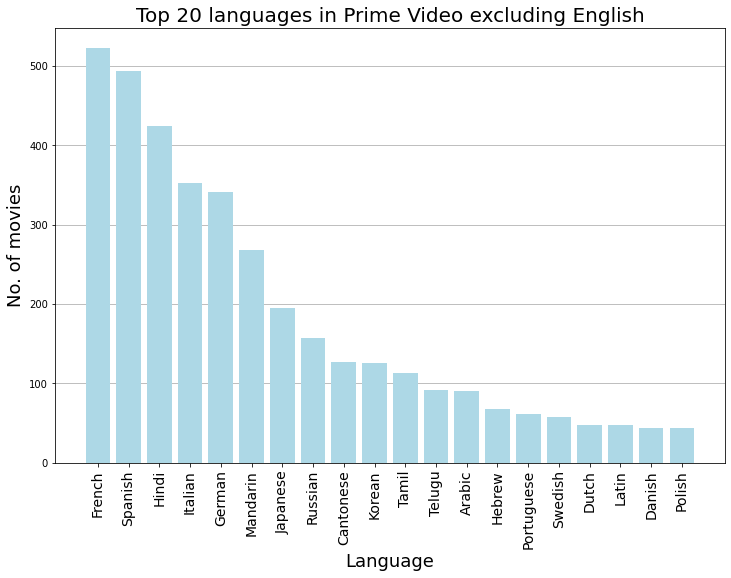

In [80]:
#Select the top 20 languages by value counts
prime_lang_top = prime_lang_sort[1:21]


#Specify x & y values
xvalues = prime_lang_top['Language'].values
yvalues= prime_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='lightblue', alpha = 1, align="center")
plt.xticks(prime_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top 20 languages in Prime Video excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [81]:
#Split and Create new dataframe for movie languages in Hulu
hulu_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Hulu']==1)]


#Split languages names and count no. of movies in each languages
hulu_lang_count = {}
for x in hulu_lang["Language"].values:

    hulu_lang_list = x.split(",")
    
    for y in hulu_lang_list:
        y = y.strip()
        
        if y not in hulu_lang_count:
            hulu_lang_count[y]=0
        hulu_lang_count[y] +=1
        
    


hululang_name = hulu_lang_count.keys() 
count_hululang = hulu_lang_count.values() 



all_hulu_lang_df=pd.DataFrame(count_hululang, hululang_name)
#all_hulu_lang_df.head(21)


hulu_lang_sort=all_hulu_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
hulu_lang_sort= hulu_lang_sort.sort_values('Counts',ascending = False)

hulu_lang_sort.reset_index().head(20)

,index,Language,Counts
0,0,English,815
1,3,French,73
2,1,Spanish,66
3,14,German,41
4,2,Japanese,35
5,8,Italian,23
6,15,Russian,18
7,7,Mandarin,17
8,6,Korean,16
9,5,Danish,13


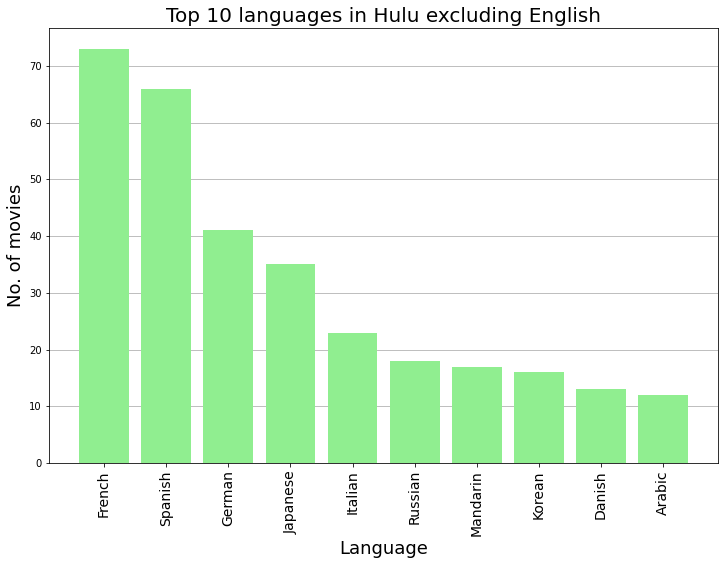

In [82]:
#Select the top 20 languages by value counts
hulu_lang_top = hulu_lang_sort[1:11]


#Specify x & y values
xvalues = hulu_lang_top['Language'].values
yvalues= hulu_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')

plt.bar(xvalues, yvalues, label='Language count', color='lightgreen', alpha = 1, align="center")
plt.xticks(hulu_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top 10 languages in Hulu excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [83]:
#Split and Create new dataframe for movie languages in Disney
disney_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Disney+']==1)]


#Split languages name and count no. of movies in each language
disney_lang_count = {}
for x in disney_lang["Language"].values:

    disney_lang_list = x.split(",")
    
    for y in disney_lang_list:
        y = y.strip()
        
        if y not in disney_lang_count:
            disney_lang_count[y]=0
        disney_lang_count[y] +=1
        
    


disneylang_name = disney_lang_count.keys() 
count_disneylang = disney_lang_count.values() 



all_disney_lang_df=pd.DataFrame(count_disneylang, disneylang_name)
#all_disney_lang_df.head(21)


disney_lang_sort=all_disney_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
disney_lang_sort= disney_lang_sort.sort_values('Counts',ascending = False)

disney_lang_sort.reset_index()

,index,Language,Counts
0,0,English,557
1,1,French,30
2,14,Spanish,20
3,8,German,17
4,22,Italian,11
5,27,Mandarin,7
6,15,Japanese,6
7,12,Xhosa,4
8,20,Korean,4
9,4,Russian,4


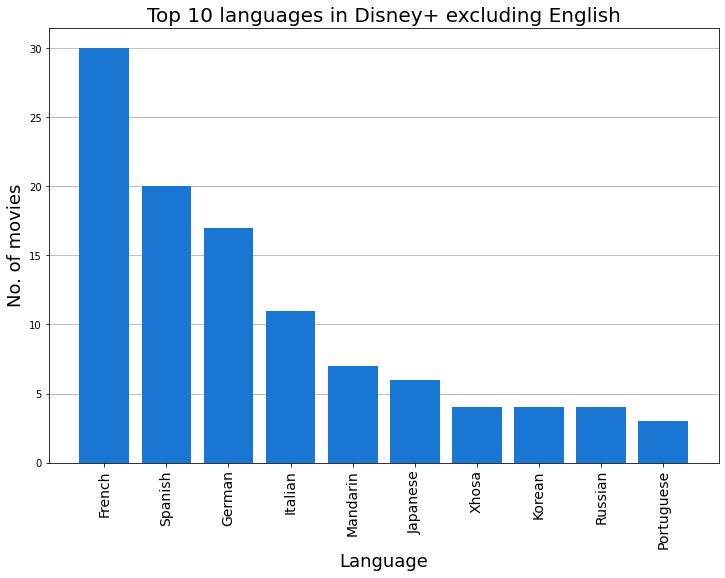

In [84]:
#Select the top 20 languages by value counts
disney_lang_top = disney_lang_sort[1:11]


#Specify x & y values
xvalues = disney_lang_top['Language'].values
yvalues= disney_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='#1976d2', alpha = 1, align="center")
plt.xticks(disney_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top 10 languages in Disney+ excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [85]:
#Merge the language dataframes of all streaming services
lang_merge1=pd.merge(netflix_lang_sort, prime_lang_sort, on='Language')
lang_merge2=pd.merge(hulu_lang_sort, disney_lang_sort, on='Language')
lang_merge_all=pd.merge(lang_merge1, lang_merge2, on='Language')
lang_merge_all = lang_merge_all.rename(columns=({'Counts_x_x': 'Netflix', 'Counts_y_x': 'Prime Video',
                                'Counts_x_y': 'Hulu','Counts_y_y':'Disney+' }))
lang_merge_all

,Language,Netflix,Prime Video,Hulu,Disney+
0,English,2264,10088,815,557
1,Hindi,377,424,3,3
2,Spanish,332,493,66,20
3,French,212,522,73,30
4,German,106,341,41,17
5,Japanese,91,195,35,6
6,Arabic,89,90,12,3
7,Mandarin,83,268,17,7
8,Italian,67,352,23,11
9,Turkish,58,34,2,2
